<a href="https://colab.research.google.com/github/simandi2877/eva/blob/master/Quiz7/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [40]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-06-13 11:24:36.767628


In [41]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-13 11:24:36.781781


### Load pre-shuffled MNIST data into train and test sets

In [42]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-06-13 11:24:37.094172


(60000, 28, 28)
2019-06-13 11:24:37.126908


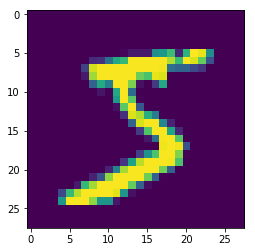

In [43]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [44]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())
print(X_train.shape)

2019-06-13 11:24:37.278598
(60000, 28, 28, 1)


In [45]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-13 11:24:37.420359


In [46]:
y_train[:10]
print(datetime.datetime.now())

2019-06-13 11:24:37.429633


In [47]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-13 11:24:37.446361


In [48]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-13 11:24:37.453621


In [66]:
## MAIN BLOCK
from keras.models import Model
from keras.layers import Input, UpSampling2D, Flatten, GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Activation
from keras.layers.merge import concatenate

x1 = Input(X_train[0,:,:,:].shape)
x2 = Conv2D(32, (3, 3), activation='relu',padding='same')(x1)
c1 = concatenate([x1,x2],axis = -1)
x3 = Conv2D(64, (3, 3), activation='relu',padding='same')(c1)
c2 = concatenate([x1,x2,x3],axis = -1)
x4 = MaxPooling2D(pool_size=(2, 2), padding='same')(c2)
x4 = UpSampling2D(size=(2, 2))(x4)
x5 = Conv2D(32, (3, 3), activation='relu',padding='same')(x4)
c3 = concatenate([x4,x5],axis = -1)
x6 = Conv2D(64, (3, 3), activation='relu',padding='same')(c3)
c4 = concatenate([x4,x5,x6],axis = -1)
x7 = Conv2D(64, (3, 3), activation='relu',padding='same')(c4)
x8 = MaxPooling2D(pool_size=(2, 2), padding='same')(x7)
x8 = UpSampling2D(size=(2, 2))(x8)
x9 = Conv2D(32, (3, 3), activation='relu',padding='same')(x8)
c5 = concatenate([x8, x9],axis = -1)
x10 = Conv2D(64, (3, 3), activation='relu',padding='same')(c5)
c6 = concatenate([x8, x9, x10],axis = -1)
x11 = Conv2D(32, (3, 3), activation='relu',padding='same')(c6)

x12 = Conv2D(32, (10, 10), activation='relu',padding='same')(x11)
x13 = Conv2D(32, (1, 1), activation='relu')(x12)
x14 = Conv2D(10, (1, 1))(x13)
test = GlobalAveragePooling2D()(x14)

x15 = Activation(activation='softmax')(test)

model = Model(x1, x15, name='enas')

#model = Sequential()

 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))

print(datetime.datetime.now())

2019-06-13 11:30:13.333027


In [67]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_114 (Conv2D)             (None, 28, 28, 32)   320         input_15[0][0]                   
__________________________________________________________________________________________________
concatenate_60 (Concatenate)    (None, 28, 28, 33)   0           input_15[0][0]                   
                                                                 conv2d_114[0][0]                 
__________________________________________________________________________________________________
conv2d_115 (Conv2D)             (None, 28, 28, 64)   19072       concatenate_60[0][0]             
__________

In [68]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-13 11:30:24.791659


In [69]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 47s 786us/step - loss: 0.4048 - acc: 0.8639
Epoch 2/10
60000/60000 [==============================] - 42s 698us/step - loss: 0.0792 - acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 42s 701us/step - loss: 0.0576 - acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 42s 699us/step - loss: 0.0487 - acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 42s 699us/step - loss: 0.0392 - acc: 0.9878
Epoch 6/10
60000/60000 [==============================] - 42s 698us/step - loss: 0.0351 - acc: 0.9888
Epoch 7/10
60000/60000 [==============================] - 42s 698us/step - loss: 0.0315 - acc: 0.9903
Epoch 8/10
60000/60000 [==============================] - 42s 698us/step - loss: 0.0275 - acc: 0.9910
Epoch 9/10
60000/60000 [==============================] - 42s 697us/step - loss: 0.0240 - acc: 0.9926
Epoch 10/10
60000/60000 [==============================] - 42s 698us/step - loss: 

In [70]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-13 11:37:38.210478


In [71]:
print(score)
print(datetime.datetime.now())

[0.028917581233443342, 0.9924]
2019-06-13 11:37:40.402177
